<a href="https://colab.research.google.com/github/Dikshab5654/OasisInfo-DA-./blob/main/Task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import lightgbm as lgbm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import warnings
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

# Move kaggle.json to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json


In [ ]:
# Download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip the downloaded file
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('creditcard.csv')
print("Successfully Imported Data!")
data.head(6)

Successfully Imported Data!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
display(data.head())
display(data.describe())
display(data.shape)
display(data.info())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


(284807, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

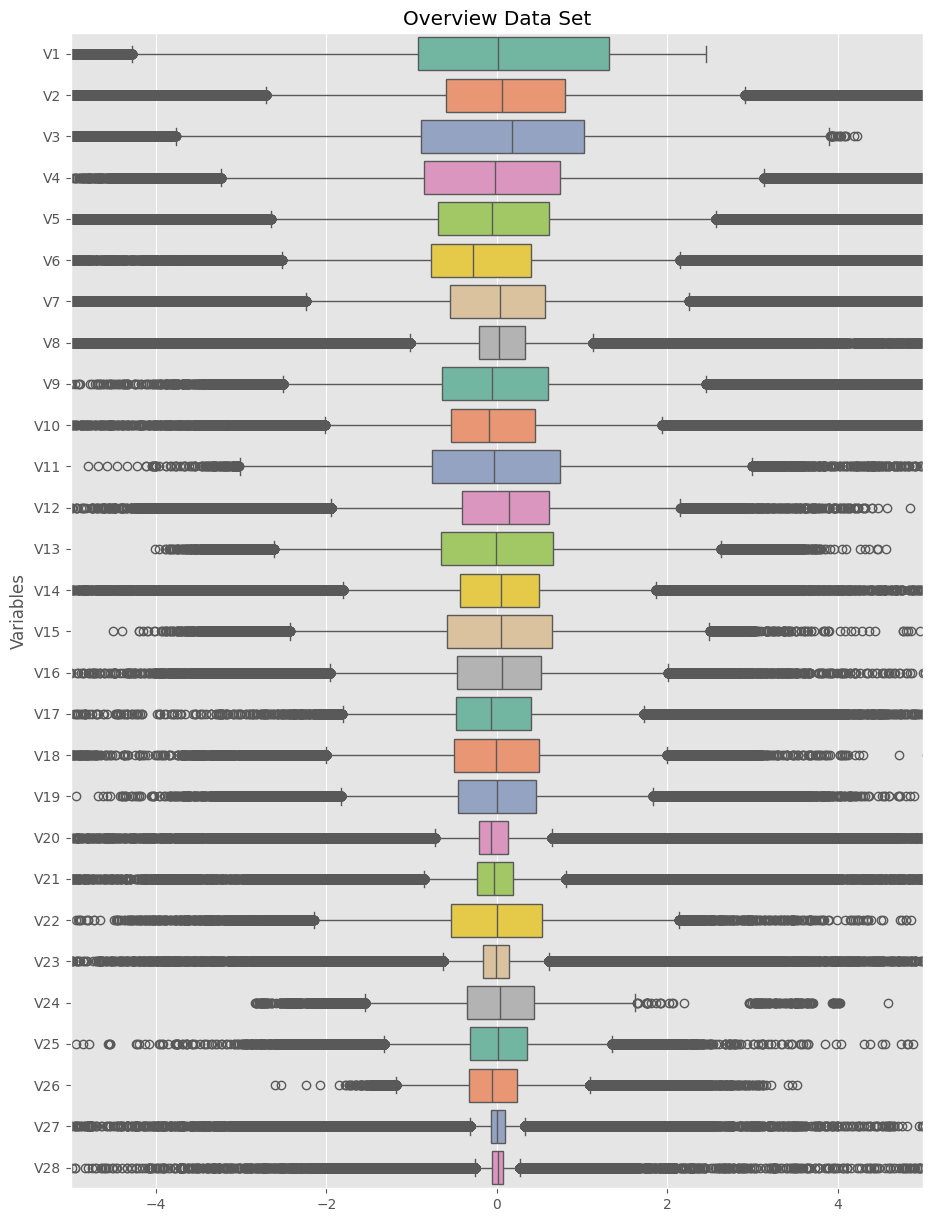

In [ ]:
# Set the style to 'ggplot' for visually appealing plots
plt.style.use('ggplot')

# Create a figure and axis with a specified size
figure, axis = plt.subplots(figsize=(11, 15))



# Set the x-axis limits
axis.set(xlim=(-5, 5))

# Label the y-axis
plt.ylabel('Variables')

# Set the title of the plot
plt.title("Overview Data Set")

# Create a horizontal boxplot using seaborn
# Exclude 'Amount', 'Class', and 'Time' columns from the analysis
sns.boxplot(data=data.drop(columns=['Amount', 'Class', 'Time']),
            orient='h',          # Set the orientation to horizontal
            palette='Set2',      # Use the 'Set2' color palette
            ax=axis)              # Specify the axis for the plot

# Display the plot
plt.show()

In [ ]:
# Function to plot distribution
def plot_distribution(selected_data):
    figure_size = (15, 8)
    sns.set_style("ticks")

    # Create a FacetGrid with hue based on 'Class' and color palette
    distribution_plot = sns.FacetGrid(data, hue='Class', aspect=2.5, palette={0: 'lime', 1: 'black'})

    # Map a kernel density plot for the selected data
    distribution_plot.map(sns.kdeplot, selected_data, shade=True, alpha=0.6)

    # Set x-axis limits based on the selected data
    distribution_plot.set(xlim=(data[selected_data].min(), data[selected_data].max()))

    # Add legend for class labels
    distribution_plot.add_legend()

    # Set axis labels and title
    distribution_plot.set_axis_labels(selected_data, 'proportion')
    distribution_plot.fig.suptitle(selected_data)

    # Show the plot
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




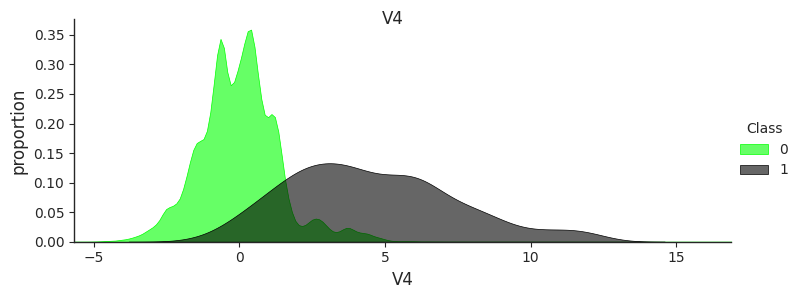

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




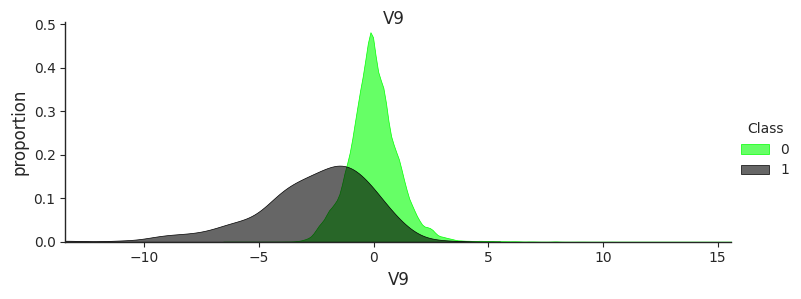

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




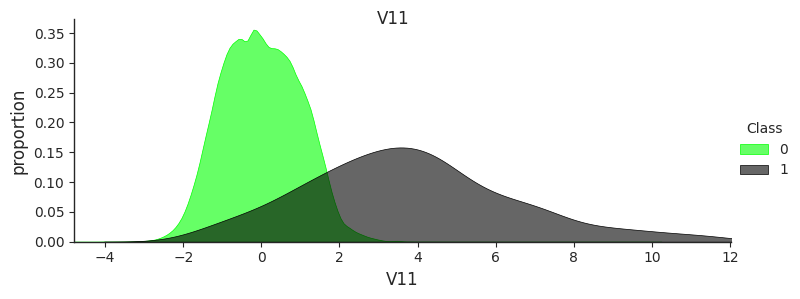

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




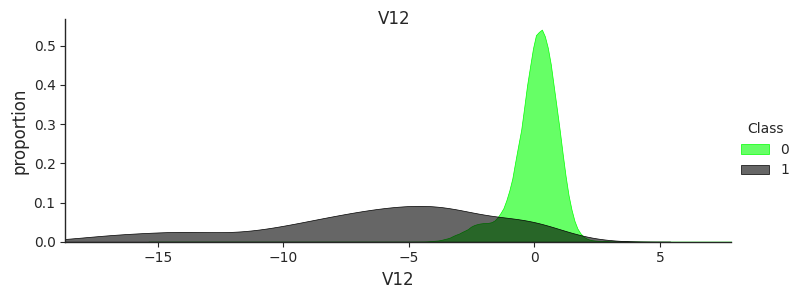

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




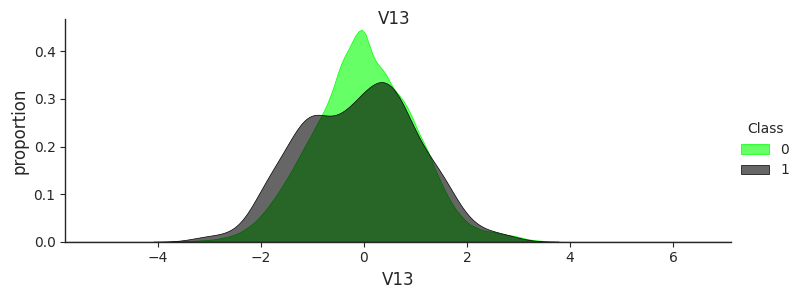

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




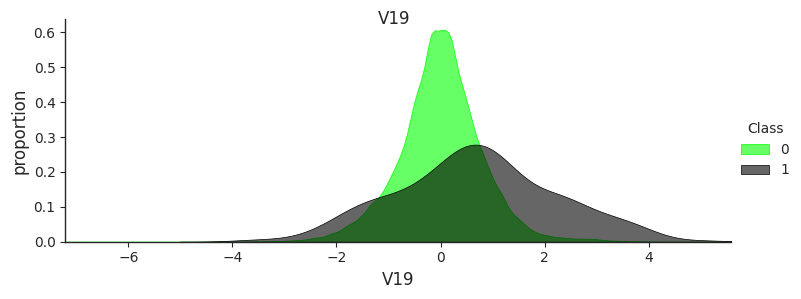

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




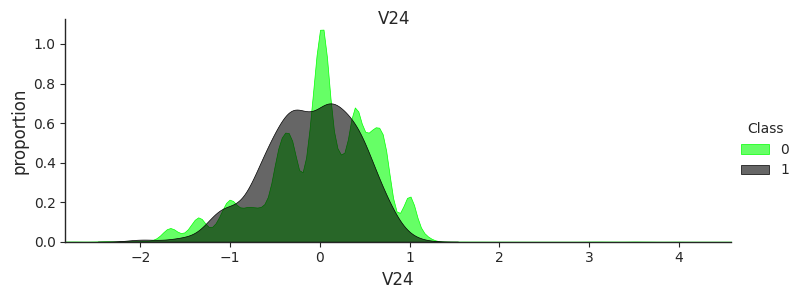

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




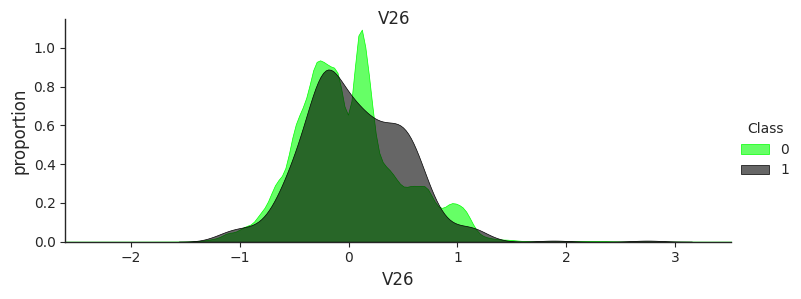

In [ ]:
#plot_distribution('V1')
#plot_distribution('V2')
#plot_distribution('V3')
plot_distribution('V4')
#plot_distribution('V5')
#plot_distribution('V6')
#plot_distribution('V7')
#plot_distribution('V8')
plot_distribution('V9')
#plot_distribution('V10')
plot_distribution('V11')
plot_distribution('V12')
plot_distribution('V13')
#plot_distribution('V14')
#plot_distribution('V15')
#plot_distribution('V16')
#plot_distribution('V17')
#plot_distribution('V18')
plot_distribution('V19')
#plot_distribution('V20')
#plot_distribution('V21')
#plot_distribution('V22')
#plot_distribution('V23')
plot_distribution('V24')
#plot_distribution('V25')
plot_distribution('V26')
#plot_distribution('V27')
#plot_distribution('V28')

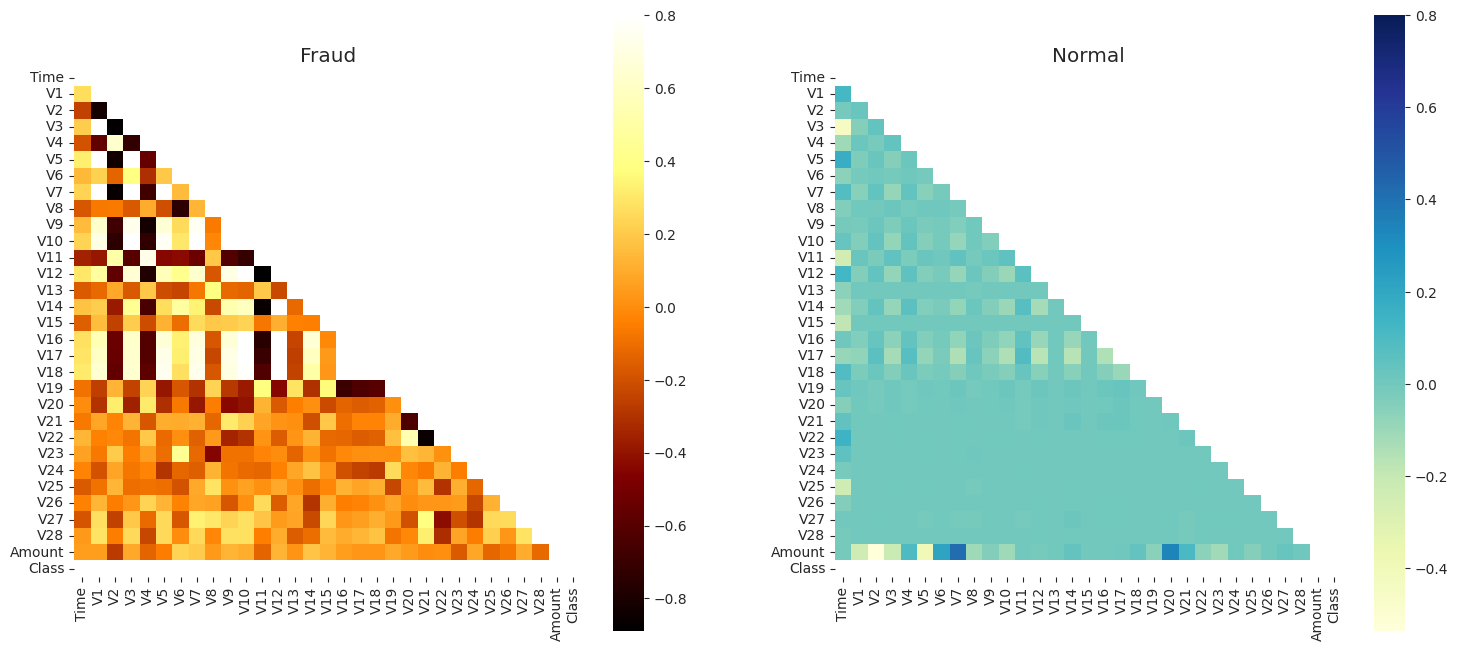

In [ ]:
# Create subplots for the correlation matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Compute the correlation matrix for the entire dataset
overall_corr = data.corr()

# Create a mask for the upper triangle of the matrix
mask = np.zeros_like(overall_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the correlation matrix for Fraudulent transactions
sns.heatmap(data[data['Class'] == 1].corr(), vmax=0.8, square=True, ax=ax1, cmap='afmhot', mask=mask)
ax1.set_title('Fraud')

# Plot the correlation matrix for Normal transactions
sns.heatmap(data[data['Class'] == 0].corr(), vmax=0.8, square=True, ax=ax2, cmap='YlGnBu', mask=mask)
ax2.set_title('Normal')

# Display the subplots
plt.show()

In [ ]:
# Normalization Amount
from sklearn.preprocessing import StandardScaler
data['nAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [ ]:
# Drop useless variables
data = data.drop(['Amount','Time'],axis=1)

In [ ]:
column_names = data.columns.tolist()
print(column_names)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'nAmount']


In [ ]:
# Assuming 'V1' is the correct name of the target variable column
target_variable = np.array(data['V1'].tolist())
data = data.drop('V1', axis=1)
features = np.array(data.values)

In [ ]:
from sklearn.model_selection import train_test_split

random_state = 42
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.20, random_state=random_state)

In [ ]:
def assess_model_performance(model):
    # Confusion matrix
    confusion_matrix_data = confusion_matrix(y_test, y_pred)
    heatmap_trace = go.Heatmap(z=confusion_matrix_data, x=["0 (pred)", "1 (pred)"],
                               y=["0 (true)", "1 (true)"], xgap=2, ygap=2,
                               colorscale='Viridis', showscale=False)

    # Calculate metrics
    true_positive = confusion_matrix_data[1, 1]
    false_negative = confusion_matrix_data[1, 0]
    false_positive = confusion_matrix_data[0, 1]
    true_negative = confusion_matrix_data[0, 0]

    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * ((precision * recall) / (precision + recall))

    metrics_data = pd.DataFrame(data=[[accuracy, precision, recall, f1_score]])
    metrics_data = metrics_data.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    bar_trace = go.Bar(x=(metrics_data[0].values),
                      y=['Accuracy', 'Precision', 'Recall', 'F1_score'],
                      text=np.round_(metrics_data[0].values, 4),
                      textposition='auto',
                      orientation='h', opacity=0.8,
                      marker=dict(color=colors,
                                  line=dict(color='#000000', width=1.5)))

    # ROC curve
    model_roc_auc = round(roc_auc_score(y_test, y_score), 3)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_curve_trace = go.Scatter(x=fpr, y=tpr,
                                 name="Roc : " + str(model_roc_auc),
                                 line=dict(color=('rgb(22, 96, 167)'), width=2), fill='tozeroy')

    random_line_trace = go.Scatter(x=[0, 1], y=[0, 1],
                                   line=dict(color=('black'), width=1.5,
                                             dash='dot'))

    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    pr_curve_trace = go.Scatter(x=recall, y=precision,
                               name="Precision" + str(precision),
                               line=dict(color=('lightcoral'), width=2), fill='tozeroy')

    # Feature importance
    coefficients = pd.DataFrame(eval(model).feature_importances_)
    column_data = pd.DataFrame(list(data))
    coefficients_summary = (pd.merge(coefficients, column_data, left_index=True,
                                     right_index=True, how="left"))
    coefficients_summary.columns = ["coefficients", "features"]
    coefficients_summary = coefficients_summary.sort_values(by="coefficients", ascending=False)
    coefficients_summary = coefficients_summary[coefficients_summary["coefficients"] != 0]

    bar_trace_feature_importance = go.Bar(x=coefficients_summary["features"], y=coefficients_summary["coefficients"],
                                          name="coefficients",
                                          marker=dict(color=coefficients_summary["coefficients"],
                                                      colorscale="Viridis",
                                                      line=dict(width=.6, color="black")))

    # Cumulative gain
    pos = pd.get_dummies(y_test).as_matrix()
    pos = pos[:, 1]
    npos = np.sum(pos)
    index = np.argsort(y_score)
    index = index[::-1]
    sort_pos = pos[index]
    cumulative_pos = np.cumsum(sort_pos)
    recall_curve = cumulative_pos / npos
    n = y_test.shape[0]
    size = np.arange(start=1, stop=369, step=1)
    size = size / n

    cumulative_gain_trace = go.Scatter(x=size, y=recall_curve,
                                      name="Lift curve",
                                      line=dict(color=('gold'), width=2), fill='tozeroy')

    # Subplots
    fig = tls.make_subplots(rows=4, cols=2, print_grid=False,
                            specs=[[{}, {}],
                                   [{}, {}],
                                   [{'colspan': 2}, None],
                                   [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Metrics',
                                            'ROC curve' + " " + '(' + str(model_roc_auc) + ')',
                                            'Precision - Recall curve',
                                            'Cumulative gains curve',
                                            'Feature importance',
                                            ))

    fig.append_trace(heatmap_trace, 1, 1)
    fig.append_trace(bar_trace, 1, 2)
    fig.append_trace(roc_curve_trace, 2, 1)
    fig.append_trace(random_line_trace, 2, 1)
    fig.append_trace(pr_curve_trace, 2, 2)
    fig.append_trace(bar_trace_feature_importance, 4, 1)
    fig.append_trace(cumulative_gain_trace, 3, 1)

    fig['layout'].update(showlegend=False,
                         title='<b>Model performance report</b><br>' + str(model),
                         autosize=False, height=1500, width=830,
                         plot_bgcolor='rgba(240,240,240, 0.95)',
                         paper_bgcolor='rgba(240,240,240, 0.95)',
                         margin=dict(b=195))

    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title="false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title="true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title="recall"), range=[0, 1.05])
    fig["layout"]["yaxis4"].update(dict(title="precision"), range=[0, 1.05])
    fig["layout"]["xaxis5"].update(dict(title="Percentage contacted"))
    fig["layout"]["yaxis5"].update(dict(title="Percentage positive targeted"))
    fig.layout.titlefont.size = 14

    py.iplot(fig)

In [ ]:
print("Unique labels in y_train:", np.unique(y_train))

Unique labels in y_train: [-56.40750963 -46.8550472  -41.92873752 ...   2.44650498   2.45188849
   2.45492999]


In [ ]:
import numpy as np
# Check for missing values in y_train (assuming y_train is a NumPy array)
print("Missing values in y_train:", np.isnan(y_train).sum())

Missing values in y_train: 0
